In [1]:
# interaction with operation system
import os
import sys
# allow python to access the paths of our/other python scripts
sys.path.append('../python') # use this if you do not have torch installed
# sys.path.append('../../emg2pose/emg2pose/') # use this if you have torch installed

# data manipulation/visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# custom script
from data import *

In [2]:
datadir = '../data/emg2pose_dataset_mini/' #stored in the data respository 
datalist = os.listdir(datadir) # list of datafiles in the directory

print('Working on dataset: ', datalist[0])
datah5 = Emg2PoseSessionData(os.path.join(datadir, datalist[0]))


Working on dataset:  2022-12-06-1670313600-e3096-cv-emg-pose-train@2-recording-13_right.hdf5


Timestamp shape: (473792,)
EMG shape: (473792, 16)
Jointangle shape: (473792, 20)


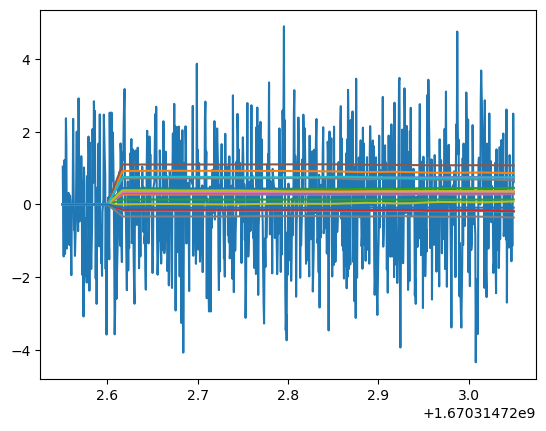

In [3]:
timestmp = datah5.timeseries[datah5.TIMESTAMPS] # nsamples vector
emgdata =  datah5.timeseries[datah5.EMG] # 2darray nsamples x nchannels?
joingangle = datah5.timeseries[datah5.JOINT_ANGLES] # 2darray nsamples x njoints?

print('Timestamp shape:' ,timestmp.shape)
print('EMG shape:' , emgdata.shape)
print('Jointangle shape:', joingangle.shape)

plt.plot(timestmp[:1000], emgdata[:1000,0])
plt.plot(timestmp[:1000], joingangle[:1000,:])
plt.show()


Recording freq 2000 Hz


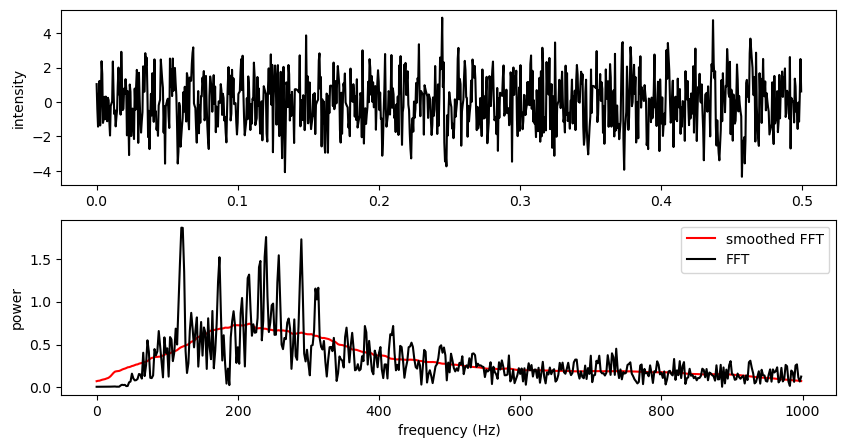

In [4]:
from scipy.fft import fft, fftfreq

#deterime samplerate from timestamps
samplerate = np.round(np.diff(timestmp).mean()**-1) #assuming this is in seconds
print('Recording freq {} Hz'.format(int(samplerate)))

N = int(samplerate/2) #Nyquist limit
T = 1.0 / samplerate
time = np.linspace(0.0, N*T, N, endpoint=False)

yf = fft(emgdata[:int(samplerate),0]) # Fourier transform
xf = fftfreq(N, T)[:N//2] # Frequencies of the transform

fig, axs = plt.subplots(2,1,figsize=(10,5))

axs[0].plot(time[:N], emgdata[:N,0], color='black') #data plot
axs[0].set_ylabel('intensity')

smoothy = np.convolve(2.0/N * np.abs(yf[0:N//2]), np.ones(100)/100, mode='same') # moving average of freq space

axs[1].plot(xf, smoothy, color='red', alpha=1, label = 'smoothed FFT') #data plot
axs[1].plot(xf, 2.0/N * np.abs(yf[0:N//2]), color='black', alpha=1, label = 'FFT') #data plot
axs[1].set_ylabel('power')
axs[1].set_xlabel('frequency (Hz)')
axs[1].legend()

plt.show()

